<a href="https://colab.research.google.com/github/Nanoth-T/Learning-Machine-Learning/blob/main/Homework_Moore_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv', header=None)
df= df.rename(columns={0: "years", 1: "data"})

df

,years,data
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


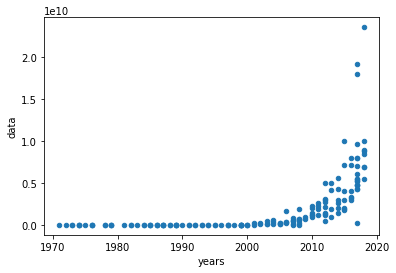

In [ ]:
df.plot(kind='scatter', x='years', y='data')

In [ ]:
df['logData'] = np.log(df['data'])
df

,years,data,logData
0,1971,2300,7.740664
1,1972,3500,8.160518
2,1973,2500,7.824046
3,1973,2500,7.824046
4,1974,4100,8.318742
...,...,...,...
157,2017,18000000000,23.613638
158,2017,19200000000,23.678176
159,2018,8876000000,22.906617
160,2018,23600000000,23.884513


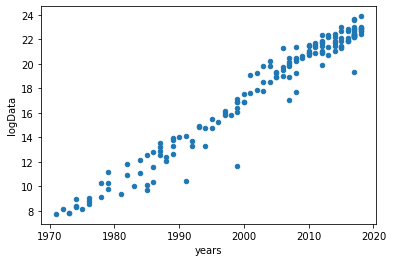

In [ ]:
df.plot(kind='scatter', x='years', y='logData')

In [ ]:
x = df['years'].values
y = df['logData'].values

y0 = df['data'].values


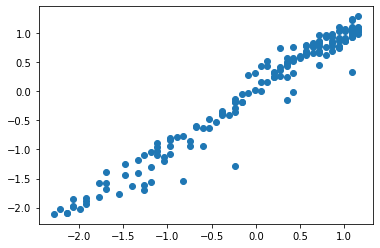

In [ ]:
mx = x.mean()
sx = x.std()

my = y.mean()
sy = y.std()

X =(x - mx)/sx
Y =(y - my)/sy


plt.scatter(X, Y)

In [ ]:
# Create the linear regression model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.m = torch.nn.Parameter(torch.randn(1))
        self.b = torch.nn.Parameter(torch.randn(1))

    def forward(self, x):
        return self.m*x + self.b


model = MyModel()

model

MyModel()

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
 #In ML we want our data to be of shape:
# (num_samples x num_dimensions)


# PyTorch uses float32 by default
# Numpy creates float64 by default

Y = Y.reshape(Y.size, 1)
X = X.reshape(X.size, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
# Train the model
n_epochs = 1000
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/1000, Loss: 0.5483
Epoch 2/1000, Loss: 0.5281
Epoch 3/1000, Loss: 0.5087
Epoch 4/1000, Loss: 0.4901
Epoch 5/1000, Loss: 0.4722
Epoch 6/1000, Loss: 0.4550
Epoch 7/1000, Loss: 0.4385
Epoch 8/1000, Loss: 0.4227
Epoch 9/1000, Loss: 0.4075
Epoch 10/1000, Loss: 0.3928
Epoch 11/1000, Loss: 0.3788
Epoch 12/1000, Loss: 0.3653
Epoch 13/1000, Loss: 0.3524
Epoch 14/1000, Loss: 0.3400
Epoch 15/1000, Loss: 0.3280
Epoch 16/1000, Loss: 0.3166
Epoch 17/1000, Loss: 0.3055
Epoch 18/1000, Loss: 0.2950
Epoch 19/1000, Loss: 0.2848
Epoch 20/1000, Loss: 0.2751
Epoch 21/1000, Loss: 0.2657
Epoch 22/1000, Loss: 0.2567
Epoch 23/1000, Loss: 0.2480
Epoch 24/1000, Loss: 0.2397
Epoch 25/1000, Loss: 0.2318
Epoch 26/1000, Loss: 0.2241
Epoch 27/1000, Loss: 0.2168
Epoch 28/1000, Loss: 0.2097
Epoch 29/1000, Loss: 0.2029
Epoch 30/1000, Loss: 0.1964
Epoch 31/1000, Loss: 0.1902
Epoch 32/1000, Loss: 0.1842
Epoch 33/1000, Loss: 0.1784
Epoch 34/1000, Loss: 0.1728
Epoch 35/1000, Loss: 0.1675
Epoch 36/1000, Loss: 0.1624
E

In [ ]:
# predict model
predicted = model(inputs).detach().numpy()

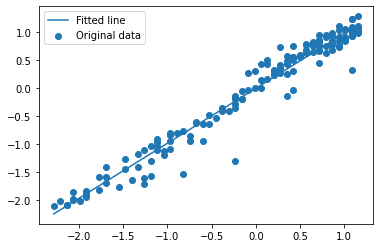

In [ ]:
# Plot the graph

plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

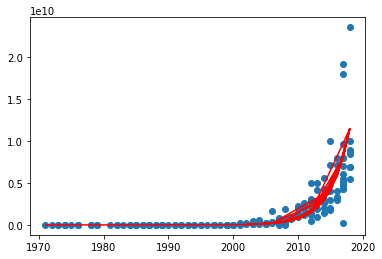

In [ ]:
plt.plot(x, np.exp(sy*predicted+my), color='red')
plt.scatter(x, y0, label='Original data')
plt.show()